### Lab 1: Data Visualization, Data Preprocessing, and Statistical Analysis Using Python in Jupyter Notebook
### Avijit Saha
### Advanced Big Data and Data Mining (MSCS-634-M20)
### Dr. Satish Penmatsa
### February 1, 2025


### Overview
In this lab, I apply data visualization, data preprocessing, and statistical analysis techniques using Jupyter Notebook. The purpose of this lab is to explore a real-world dataset, clean and prepare it for analysis, visualize meaningful patterns, and compute statistical measures that describe the dataset’s central tendency, dispersion, and correlation between variables.

### Step 1: Data Collection
#### Dataset Description

For this lab, I used a Sales Performance Dataset of a super store containing information about orders, sales amount, profit, product category, region, and order date. This type of dataset is well-suited for visualization and statistical analysis because it includes both numerical and categorical variables as well as time-based data.

The dataset was sourced from Kaggle - https://www.kaggle.com/datasets/fatihilhan/global-superstore-dataset

In [1]:
import pandas as pd
df = pd.read_csv("superstore.csv") # Load sales data from a CSV file
print(df.head())

          Category         City        Country Customer.ID     Customer.Name  \
0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   

   Discount Market  记录数               Order.Date        Order.ID  ... Sales  \
0       0.0     US    1  2011-01-07 00:00:00.000  CA-2011-130813  ...    19   
1       0.0     US    1  2011-01-21 00:00:00.000  CA-2011-148614  ...    19   
2       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...    21   
3       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...   111   
4       0.0     US    1  2011-09-29 00:00:00.000  CA-2011-146969  ...     6   

    Segment                Ship.Date       S

### Step 2: Data Visualization
Here I explore the dataset using scatter plot and bar chart visualization techniques to understand patterns, trends, and distributions.

In [2]:
import matplotlib.pyplot as plt # import visualization library
import seaborn as sns


# Set style
sns.set(style="whitegrid")

##### 1. Scatter Plot-Relationship Between Sales and Profit

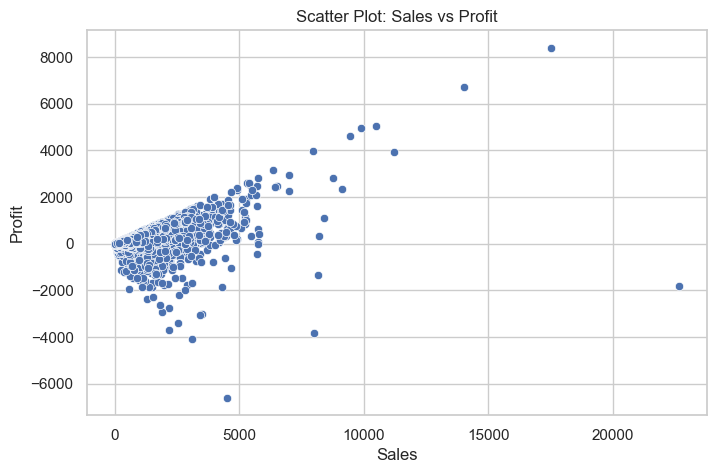

In [3]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Sales", y="Profit", data=df)
plt.title("Scatter Plot: Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

**Insight:** <br>
This scatter plot shows the relationship between sales and profit. In general, higher sales values tend to correspond to higher profits, although some points show negative profit, indicating potential losses on certain orders.

##### 2. Bar Chart – Sales by Category

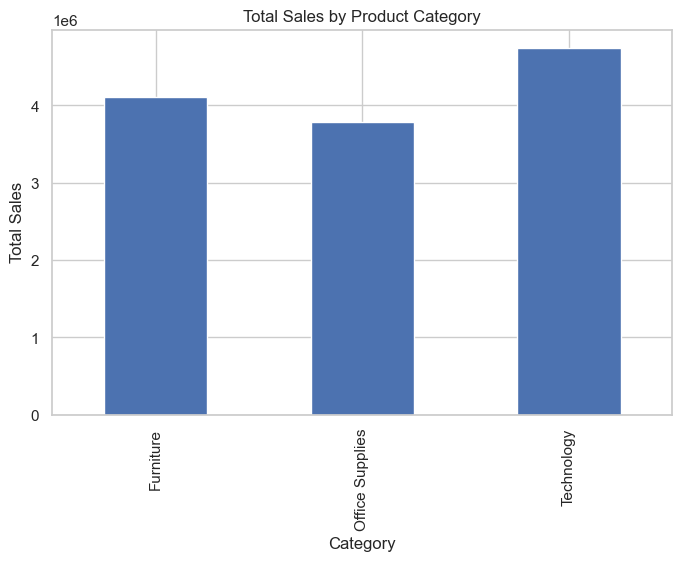

In [4]:
plt.figure(figsize=(8, 5))
df.groupby("Category")["Sales"].sum().plot(kind="bar")
plt.title("Total Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

**Insight:** <br>
This bar chart compares total sales across product categories. It highlights which categories contribute the most to overall revenue and helps identify strong and weak product segments.

##### 3. Box Plot

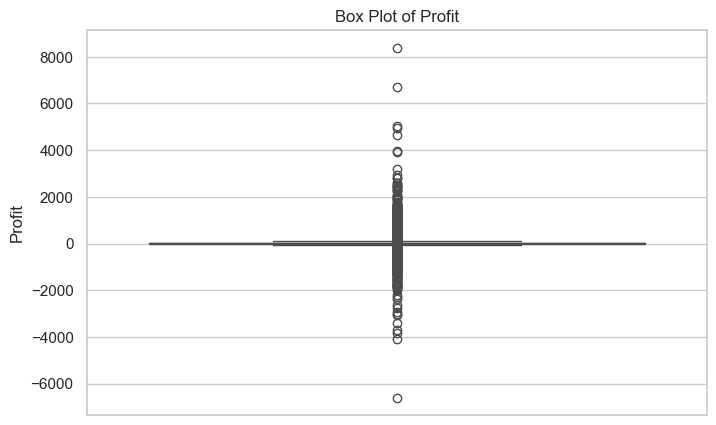

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["Profit"])
plt.title("Box Plot of Profit")
plt.ylabel("Profit")
plt.show()

**Insight:** <br>
The box plot reveals the spread of profit values and highlights potential outliers where profit is unusually high or low.

### Step 3: Data Preprocessing

Renaming Column Name from a non English to English Column

In [6]:
df = df.rename(columns={"记录数": "Record_Count"})

In [7]:
print(df.columns)

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', 'Record_Count', 'Order.Date', 'Order.ID',
       'Order.Priority', 'Product.ID', 'Product.Name', 'Profit', 'Quantity',
       'Region', 'Row.ID', 'Sales', 'Segment', 'Ship.Date', 'Ship.Mode',
       'Shipping.Cost', 'State', 'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')


##### 1. Handling Missing Values

In [8]:
print(df.isnull().sum())

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
Record_Count      0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64


No missing value found here. So, let recheck it by copying the dataset in a new data frame **df_clean**

In [9]:
df_clean = df.copy()
print(df_clean.isnull().sum())

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
Record_Count      0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64


**No missing values were detected in the dataset, so no imputation or row removal was necessary.**

##### 2. Outlier Detection and Removal (IQR Method)

In [10]:
Q1 = df["Sales"].quantile(0.25)
Q3 = df["Sales"].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df["Sales"] < lower_bound) | (df["Sales"] > upper_bound)]
print("Outliers:")
print(outliers)


# Remove outliers
clean_df = df[(df["Sales"] >= lower_bound) & (df["Sales"] <= upper_bound)]


print("Dataset shape after removing outliers:", clean_df.shape)

Outliers:
              Category         City        Country Customer.ID  \
196    Office Supplies  Los Angeles  United States   RS-197654   
201    Office Supplies  Los Angeles  United States   DE-132554   
221    Office Supplies  Los Angeles  United States   PF-192254   
226    Office Supplies  Los Angeles  United States   AI-108554   
231    Office Supplies  Los Angeles  United States   SC-207254   
...                ...          ...            ...         ...   
51177       Technology  Los Angeles  United States   BT-115304   
51185       Technology  Los Angeles  United States   FA-142304   
51256  Office Supplies  Los Angeles  United States   TG-213104   
51271  Office Supplies  Los Angeles  United States   WB-218504   
51278  Office Supplies  Los Angeles  United States   ES-140204   

           Customer.Name  Discount Market  Record_Count  \
196       Roland Schwarz       0.0     US             1   
201           Deanra Eno       0.0     US             1   
221    Phillip Flath

##### 3. Data Reduction<br>

In [11]:
print("Before Sampling:", df.shape) #shape before sampling
print("Before Reduction:")
print(df.head()) #data befor data reduction

Before Sampling: (51290, 27)
Before Reduction:
          Category         City        Country Customer.ID     Customer.Name  \
0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   

   Discount Market  Record_Count               Order.Date        Order.ID  \
0       0.0     US             1  2011-01-07 00:00:00.000  CA-2011-130813   
1       0.0     US             1  2011-01-21 00:00:00.000  CA-2011-148614   
2       0.0     US             1  2011-08-05 00:00:00.000  CA-2011-118962   
3       0.0     US             1  2011-08-05 00:00:00.000  CA-2011-118962   
4       0.0     US             1  2011-09-29 00:00:00.000  CA-2011-146969   

   ... Sa

**Sampling**

In [12]:
# Take 50% sample of the dataset
sample_df = clean_df.sample(frac=0.5, random_state=42)
print("Sample shape:", sample_df.shape)

Sample shape: (22818, 27)


**Dimention Reduction**

In [13]:
# Drop less relevant columns (example: Row ID)
if "Row ID" in sample_df.columns:
    reduced_df = sample_df.drop(columns=["Row ID"])
else:
    reduced_df = sample_df


print(reduced_df.head())

              Category           City        Country Customer.ID  \
28705       Technology  San Francisco  United States   NS-186404   
652    Office Supplies      San Diego  United States   SW-204554   
29084        Furniture     Argenteuil         France   ON-187152   
42282        Furniture        Bangkok       Thailand   TP-211301   
9787   Office Supplies           Jixi          China   CS-124601   

          Customer.Name  Discount Market  Record_Count  \
28705      Noel Staavos      0.00     US             1   
652         Shaun Weien      0.00     US             1   
29084     Odella Nelson      0.10     EU             1   
42282  Theone Pippenger      0.27   APAC             1   
9787        Chuck Sachs      0.00   APAC             1   

                    Order.Date         Order.ID  ... Sales    Segment  \
28705  2012-10-20 00:00:00.000   US-2012-160563  ...   240  Corporate   
652    2014-07-22 00:00:00.000   CA-2014-145429  ...    16   Consumer   
29084  2011-12-28 00:00

##### 4. Data Scaling and Discretization

**Min-Max Scaling**

In [14]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
reduced_df[["Sales", "Profit"]] = scaler.fit_transform(reduced_df[["Sales", "Profit"]])


print(reduced_df[["Sales", "Profit"]].head())

          Sales    Profit
28705  0.413081  0.910434
652    0.027539  0.874799
29084  0.824441  0.962882
42282  0.156627  0.875814
9787   0.166954  0.880558


**Discretization**

In [15]:
# Convert Sales into categories
reduced_df["Sales_Category"] = pd.cut(
reduced_df["Sales"],
bins=3,
labels=["Low", "Medium", "High"]
)


print(reduced_df[["Sales", "Sales_Category"]].head())

          Sales Sales_Category
28705  0.413081         Medium
652    0.027539            Low
29084  0.824441           High
42282  0.156627            Low
9787   0.166954            Low


### Step 4: Statistical Analysis

#### 1. General Overview

In [16]:
print("Info:")
print(reduced_df.info())
print("Describe:")
print(reduced_df.describe())

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 22818 entries, 28705 to 26114
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Category        22818 non-null  object  
 1   City            22818 non-null  object  
 2   Country         22818 non-null  object  
 3   Customer.ID     22818 non-null  object  
 4   Customer.Name   22818 non-null  object  
 5   Discount        22818 non-null  float64 
 6   Market          22818 non-null  object  
 7   Record_Count    22818 non-null  int64   
 8   Order.Date      22818 non-null  object  
 9   Order.ID        22818 non-null  object  
 10  Order.Priority  22818 non-null  object  
 11  Product.ID      22818 non-null  object  
 12  Product.Name    22818 non-null  object  
 13  Profit          22818 non-null  float64 
 14  Quantity        22818 non-null  int64   
 15  Region          22818 non-null  object  
 16  Row.ID          22818 non-null  int64   
 17  Sales  

#### 2. Central Tendency Measures

In [17]:
print("Minimum:\n", reduced_df.min(numeric_only=True))
print("Maximum:\n", reduced_df.max(numeric_only=True))
print("Mean:\n", reduced_df.mean(numeric_only=True))
print("Median:\n", reduced_df.median(numeric_only=True))
print("Mode:\n", reduced_df.mode(numeric_only=True).iloc[0])

Minimum:
 Discount            0.00
Record_Count        1.00
Profit              0.00
Quantity            1.00
Row.ID              1.00
Sales               0.00
Shipping.Cost       0.01
Year             2011.00
weeknum             1.00
dtype: float64
Maximum:
 Discount             0.85
Record_Count         1.00
Profit               1.00
Quantity            14.00
Row.ID           51289.00
Sales                1.00
Shipping.Cost      246.05
Year              2014.00
weeknum             53.00
dtype: float64
Mean:
 Discount             0.149352
Record_Count         1.000000
Profit               0.875876
Quantity             3.255763
Row.ID           25800.241520
Sales                0.208338
Shipping.Cost       13.236700
Year              2012.779648
weeknum             31.186519
dtype: float64
Median:
 Discount             0.000000
Record_Count         1.000000
Profit               0.874697
Quantity             3.000000
Row.ID           25978.000000
Sales                0.113597
Shipping.C

#### 3. Dispersion Measures

In [18]:
range_vals = reduced_df.max(numeric_only=True) - reduced_df.min(numeric_only=True)


Q1 = reduced_df.quantile(0.25, numeric_only=True)
Q3 = reduced_df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1


print("Range:\n", range_vals)
print("Quartiles:\n", Q1, Q3)
print("IQR:\n", IQR)
print("Variance:\n", reduced_df.var(numeric_only=True))
print("Standard Deviation:\n", reduced_df.std(numeric_only=True))

Range:
 Discount             0.85
Record_Count         0.00
Profit               1.00
Quantity            13.00
Row.ID           51288.00
Sales                1.00
Shipping.Cost      246.04
Year                 3.00
weeknum             52.00
dtype: float64
Quartiles:
 Discount             0.000000
Record_Count         1.000000
Profit               0.871306
Quantity             2.000000
Row.ID           12633.250000
Sales                0.046472
Shipping.Cost        2.240000
Year              2012.000000
weeknum             20.000000
Name: 0.25, dtype: float64 Discount             0.200000
Record_Count         1.000000
Profit               0.883245
Quantity             4.000000
Row.ID           38923.000000
Sales                0.287435
Shipping.Cost       16.300000
Year              2014.000000
weeknum             44.000000
Name: 0.75, dtype: float64
IQR:
 Discount             0.200000
Record_Count         0.000000
Profit               0.011940
Quantity             2.000000
Row.ID     

#### 4. Correlation Analysis

               Discount  Record_Count    Profit  Quantity    Row.ID     Sales  \
Discount       1.000000           NaN -0.515461  0.001294  0.099173 -0.122546   
Record_Count        NaN           NaN       NaN       NaN       NaN       NaN   
Profit        -0.515461           NaN  1.000000  0.035657 -0.041963  0.204097   
Quantity       0.001294           NaN  0.035657  1.000000 -0.174236  0.257494   
Row.ID         0.099173           NaN -0.041963 -0.174236  1.000000 -0.100848   
Sales         -0.122546           NaN  0.204097  0.257494 -0.100848  1.000000   
Shipping.Cost -0.094408           NaN  0.171935  0.192353 -0.072700  0.756852   
Year          -0.001439           NaN  0.002621 -0.008881  0.004242 -0.001680   
weeknum        0.001061           NaN -0.005709  0.016464 -0.032898 -0.007160   

               Shipping.Cost      Year   weeknum  
Discount           -0.094408 -0.001439  0.001061  
Record_Count             NaN       NaN       NaN  
Profit              0.171935  0.0026

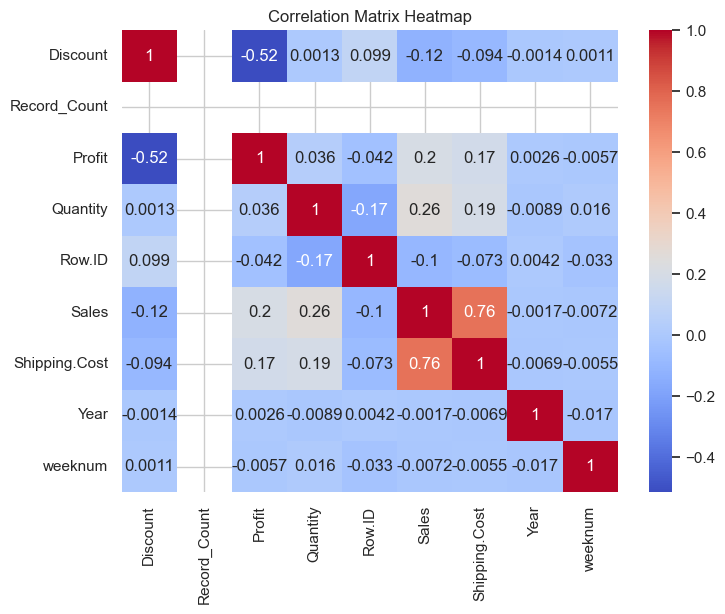

In [19]:
correlation_matrix = reduced_df.corr(numeric_only=True)
print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()